# <font color='#0E6655'> </b> <center> WEATHER STATION CLUSTERING WITH DBSCAN </center> </b> </font>

TABLA DE CONTENDIP

<a name="1"></a>
## <b> <font color='green'> 1. Introduction </b> </font>

DBSCAN es especialmente bueno para tareas como identificación de clases en un contexto espacial. Lo maravilloso de DBSCAN es que puede encontrar clusters de forma arbitraria sin ser afectado por el ruido. Por ejemplo, el siguiente ejemplo clusteriza las ubicaciones de las estaciones de tiempo en Canadá. DBSCAN puede ser utilizado aquí para por ejemplo encontrar grupos de estaciones que muestren las mismas condiciones climáticas. No sólo encuentra clusters de forma arbitraria diferente, también puede encontrar la parte más densa de las muestras ignorando áreas menos densas o ruidos.

<a name="2"></a>
## <b> <font color='green'> 2. Modules </b> </font>

In [24]:
import pandas as pd

<a name="3"></a>
## <b> <font color='green'> 3. Helper Functions </b> </font>

<a name="4"></a>
## <b> <font color='green'> 4. Loading, exploring and pre-processing data </b> </font>

In [25]:
!cd data && ls

weather-stations.csv


In [26]:
df = pd.read_csv('data/weather-stations.csv')
df.head()

Stn_Name     Lat     Long Prov   Tm  DwTm    D    Tx  DwTx  \
0               CHEMAINUS  48.935 -123.742   BC  8.2   0.0  NaN  13.5   0.0   
1  COWICHAN LAKE FORESTRY  48.824 -124.133   BC  7.0   0.0  3.0  15.0   0.0   
2           LAKE COWICHAN  48.829 -124.052   BC  6.8  13.0  2.8  16.0   9.0   
3        DISCOVERY ISLAND  48.425 -123.226   BC  NaN   NaN  NaN  12.5   0.0   
4     DUNCAN KELVIN CREEK  48.735 -123.728   BC  7.7   2.0  3.4  14.5   2.0   

    Tn  ...  DwP    P%N  S_G    Pd  BS  DwBS  BS%    HDD  CDD   Stn_No  
0  1.0  ...  0.0    NaN  0.0  12.0 NaN   NaN  NaN  273.3  0.0  1011500  
1 -3.0  ...  0.0  104.0  0.0  12.0 NaN   NaN  NaN  307.0  0.0  1012040  
2 -2.5  ...  9.0    NaN  NaN  11.0 NaN   NaN  NaN  168.1  0.0  1012055  
3  NaN  ...  NaN    NaN  NaN   NaN NaN   NaN  NaN    NaN  NaN  1012475  
4 -1.0  ...  2.0    NaN  NaN  11.0 NaN   NaN  NaN  267.7  0.0  1012573  

[5 rows x 25 columns]

In [27]:
df.shape

(1341, 25)

In [28]:
df.columns

Index(['Stn_Name', 'Lat', 'Long', 'Prov', 'Tm', 'DwTm', 'D', 'Tx', 'DwTx',
       'Tn', 'DwTn', 'S', 'DwS', 'S%N', 'P', 'DwP', 'P%N', 'S_G', 'Pd', 'BS',
       'DwBS', 'BS%', 'HDD', 'CDD', 'Stn_No'],
      dtype='object')

In [29]:
df.dtypes

Stn_Name     object
Lat         float64
Long        float64
Prov         object
Tm          float64
DwTm        float64
D           float64
Tx          float64
DwTx        float64
Tn          float64
DwTn        float64
S           float64
DwS         float64
S%N         float64
P           float64
DwP         float64
P%N         float64
S_G         float64
Pd          float64
BS          float64
DwBS        float64
BS%         float64
HDD         float64
CDD         float64
Stn_No       object
dtype: object

In [30]:
df.isnull().sum()

Stn_Name       0
Lat            0
Long           0
Prov           0
Tm            85
DwTm          85
D            984
Tx            81
DwTx          81
Tn            81
DwTn          81
S            755
DwS          755
S%N         1143
P            114
DwP          114
P%N         1132
S_G          543
Pd           114
BS          1341
DwBS        1341
BS%         1341
HDD           85
CDD           85
Stn_No         0
dtype: int64

Remove rows with NaN values in 'Tm':

In [31]:
df = df[pd.notnull(df["Tm"])]
df = df.reset_index(drop=True)
df.head()

Stn_Name     Lat     Long Prov   Tm  DwTm    D    Tx  DwTx  \
0               CHEMAINUS  48.935 -123.742   BC  8.2   0.0  NaN  13.5   0.0   
1  COWICHAN LAKE FORESTRY  48.824 -124.133   BC  7.0   0.0  3.0  15.0   0.0   
2           LAKE COWICHAN  48.829 -124.052   BC  6.8  13.0  2.8  16.0   9.0   
3     DUNCAN KELVIN CREEK  48.735 -123.728   BC  7.7   2.0  3.4  14.5   2.0   
4       ESQUIMALT HARBOUR  48.432 -123.439   BC  8.8   0.0  NaN  13.1   0.0   

    Tn  ...  DwP    P%N  S_G    Pd  BS  DwBS  BS%    HDD  CDD   Stn_No  
0  1.0  ...  0.0    NaN  0.0  12.0 NaN   NaN  NaN  273.3  0.0  1011500  
1 -3.0  ...  0.0  104.0  0.0  12.0 NaN   NaN  NaN  307.0  0.0  1012040  
2 -2.5  ...  9.0    NaN  NaN  11.0 NaN   NaN  NaN  168.1  0.0  1012055  
3 -1.0  ...  2.0    NaN  NaN  11.0 NaN   NaN  NaN  267.7  0.0  1012573  
4  1.9  ...  8.0    NaN  NaN  12.0 NaN   NaN  NaN  258.6  0.0  1012710  

[5 rows x 25 columns]

Visualización de estaciones en el mapa usando el paquete basemap. La herramienta basemap de matplotlib es una librería para realizar gráficos 2D sobre mapas en Python. Basemap no realiza gráficas por cuenta propia, pero brinda facilidades para transformar las coordenadas en proyecciones de mapa.

Observe que el tamaño de cada punto de datos representa el promedio de la máxima temperatura para cada estación en el año.

In [32]:
#pip install basemap
!pip show basemap


Name: basemap
Version: 1.4.1
Summary: Plot data on map projections with matplotlib
Home-page: https://matplotlib.org/basemap
Author: Jeff Whitaker
Author-email: jeffrey.s.whitaker@noaa.gov
License: MIT
Location: /home/marcos/.local/lib/python3.10/site-packages
Requires: basemap-data, matplotlib, numpy, packaging, pyproj, pyshp
Required-by: 


/tmp/ipykernel_292402/4023849616.py:31: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  pdf['xm']= xs.tolist()
/tmp/ipykernel_292402/4023849616.py:32: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  pdf['ym'] =ys.tolist()


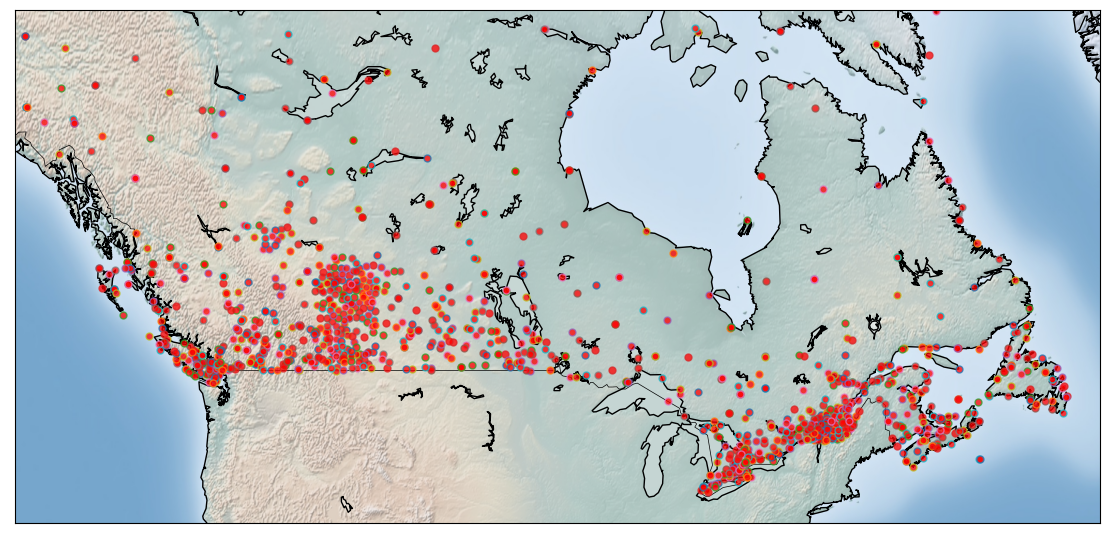

In [33]:


from mpl_toolkits.basemap import Basemap
import matplotlib.pyplot as plt
from pylab import rcParams
import numpy as np

rcParams['figure.figsize'] = (14,10)

llon=-140
ulon=-50
llat=40
ulat=65



pdf = df[(df['Long'] > llon) & (df['Long'] < ulon) & (df['Lat'] > llat) &(df['Lat'] < ulat)]

my_map = Basemap(projection='merc',
            resolution = 'l', area_thresh = 1000.0,
            llcrnrlon=llon, llcrnrlat=llat, #min longitude (llcrnrlon) and latitude (llcrnrlat)
            urcrnrlon=ulon, urcrnrlat=ulat) #max longitude (urcrnrlon) and latitude (urcrnrlat)

my_map.drawcoastlines()
my_map.drawcountries()
# my_map.drawmapboundary()
my_map.fillcontinents(color = 'white', alpha = 0.3)
my_map.shadedrelief()

# To collect data based on stations        

xs,ys = my_map(np.asarray(pdf.Long), np.asarray(pdf.Lat))
pdf['xm']= xs.tolist()
pdf['ym'] =ys.tolist()

#Visualization1
for index,row in pdf.iterrows():
#   x,y = my_map(row.Long, row.Lat)
   my_map.plot(row.xm, row.ym,markerfacecolor =([1,0,0]),  marker='o', markersize= 5, alpha = 0.75)
#plt.text(x,y,stn)
plt.show()

# Clustering de estaciones basado en su ubicación i.e. Lat & Lon

DBSCAN de sklearn puede ejecutar DBSCAN desde un arreglo vectorial o una matriz de distancia. En nuestro caso, pasamos el arreglo de NumPy Clus_dataSet para encontrar las muestras de núcleo de alta densidad y expandimos los clusters desde ellas.

In [34]:
from sklearn.cluster import DBSCAN
import sklearn.utils
from sklearn.preprocessing import StandardScaler

sklearn.utils.check_random_state(1000)

Clus_dataSet = pdf[['xm','ym']]
Clus_dataSet = np.nan_to_num(Clus_dataSet)


Clus_dataSet = StandardScaler().fit_transform(Clus_dataSet)

# Compute DBSCAN
db = DBSCAN(eps=0.15, min_samples=10).fit(Clus_dataSet)
core_samples_mask = np.zeros_like(db.labels_, dtype=bool)
core_samples_mask[db.core_sample_indices_] = True
labels = db.labels_
pdf["Clus_Db"]=labels

realClusterNum=len(set(labels)) - (1 if -1 in labels else 0)
clusterNum = len(set(labels)) 


# A sample of clusters
pdf[["Stn_Name","Tx","Tm","Clus_Db"]].head(5)

/tmp/ipykernel_292402/2114752550.py:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  pdf["Clus_Db"]=labels


Stn_Name    Tx   Tm  Clus_Db
0               CHEMAINUS  13.5  8.2        0
1  COWICHAN LAKE FORESTRY  15.0  7.0        0
2           LAKE COWICHAN  16.0  6.8        0
3     DUNCAN KELVIN CREEK  14.5  7.7        0
4       ESQUIMALT HARBOUR  13.1  8.8        0

In [35]:
set(labels) #outliers will be labeled with -1

{-1, 0, 1, 2, 3, 4}

/tmp/ipykernel_292402/3476359820.py:28: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  c=(([0.4,0.4,0.4]) if clust_number == -1 else colors[np.int(clust_number)])


Cluster 0, Avg Temp: -5.538747553816046
Cluster 1, Avg Temp: 1.9526315789473685
Cluster 2, Avg Temp: -9.195652173913045
Cluster 3, Avg Temp: -15.300833333333333
Cluster 4, Avg Temp: -7.769047619047619


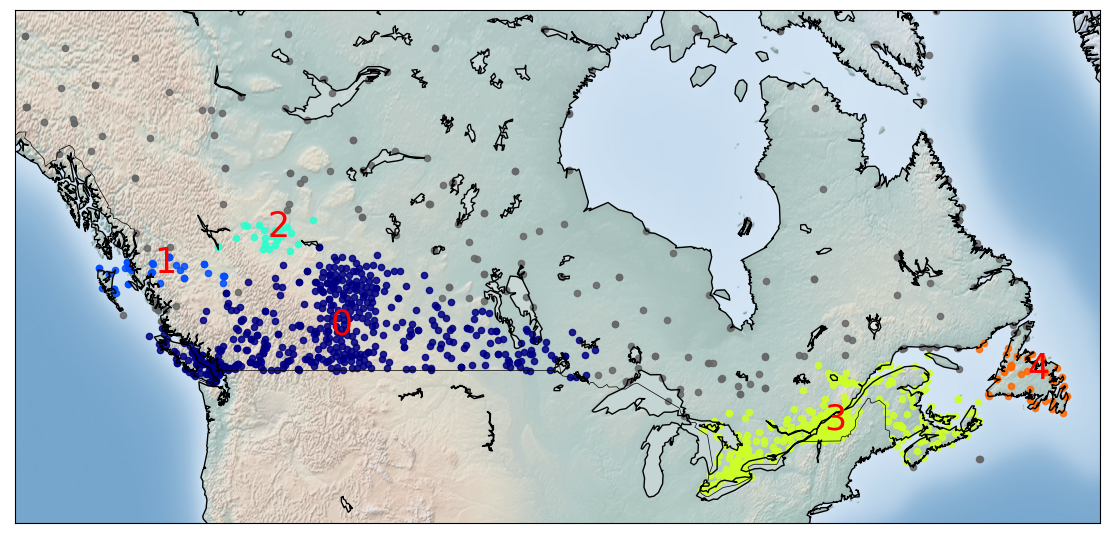

In [36]:
# Visualizando los clusters


from mpl_toolkits.basemap import Basemap
import matplotlib.pyplot as plt
from pylab import rcParams
%matplotlib inline
rcParams['figure.figsize'] = (14,10)

my_map = Basemap(projection='merc',
            resolution = 'l', area_thresh = 1000.0,
            llcrnrlon=llon, llcrnrlat=llat, #min longitude (llcrnrlon) and latitude (llcrnrlat)
            urcrnrlon=ulon, urcrnrlat=ulat) #max longitude (urcrnrlon) and latitude (urcrnrlat)

my_map.drawcoastlines()
my_map.drawcountries()
#my_map.drawmapboundary()
my_map.fillcontinents(color = 'white', alpha = 0.3)
my_map.shadedrelief()

# To create a color map
colors = plt.get_cmap('jet')(np.linspace(0.0, 1.0, clusterNum))



#Visualization1
for clust_number in set(labels):
    c=(([0.4,0.4,0.4]) if clust_number == -1 else colors[np.int(clust_number)])
    clust_set = pdf[pdf.Clus_Db == clust_number]                    
    my_map.scatter(clust_set.xm, clust_set.ym, color =c,  marker='o', s= 20, alpha = 0.85)
    if clust_number != -1:
        cenx=np.mean(clust_set.xm) 
        ceny=np.mean(clust_set.ym) 
        plt.text(cenx,ceny,str(clust_number), fontsize=25, color='red',)
        print ("Cluster "+str(clust_number)+', Avg Temp: '+ str(np.mean(clust_set.Tm)))

In [ ]:
# repite para más variables

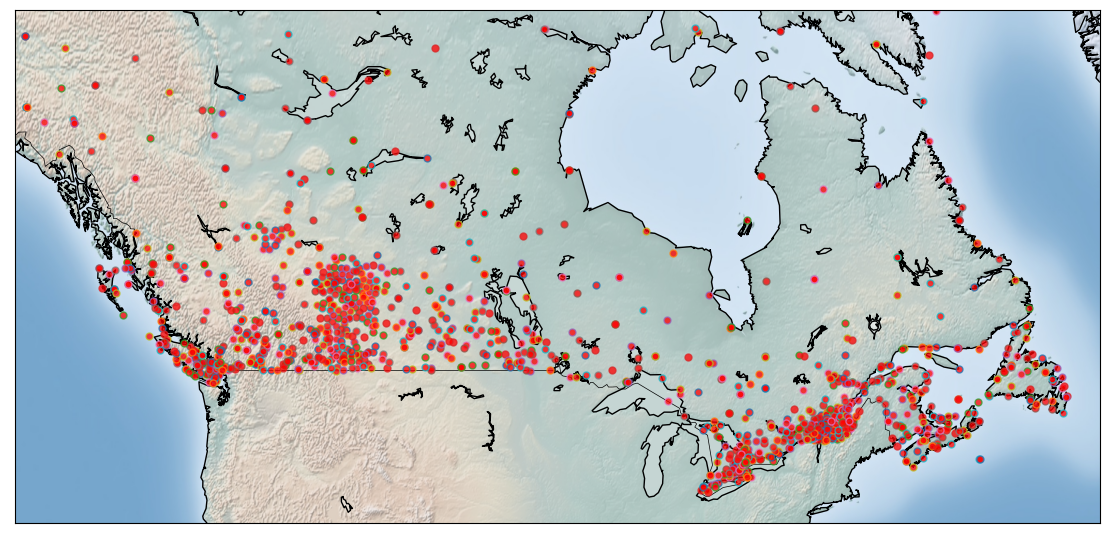

In [42]:
pdf = df[(df['Long'] > llon) & (df['Long'] < ulon) & (df['Lat'] > llat) &(df['Lat'] < ulat)].copy()

my_map = Basemap(projection='merc',
            resolution = 'l', area_thresh = 1000.0,
            llcrnrlon=llon, llcrnrlat=llat, #min longitude (llcrnrlon) and latitude (llcrnrlat)
            urcrnrlon=ulon, urcrnrlat=ulat) #max longitude (urcrnrlon) and latitude (urcrnrlat)

my_map.drawcoastlines()
my_map.drawcountries()
# my_map.drawmapboundary()
my_map.fillcontinents(color = 'white', alpha = 0.3)
my_map.shadedrelief()

# To collect data based on stations        
xs, ys = my_map(np.asarray(pdf['Long']), np.asarray(pdf['Lat']))
pdf['xm'] = xs.tolist()
pdf['ym'] = ys.tolist()

# Visualization1
for index, row in pdf.iterrows():
    my_map.plot(row['xm'], row['ym'], markerfacecolor=([1,0,0]), marker='o', markersize=5, alpha=0.75)
    # You can add labels if needed using plt.text()
    #plt.text(row['xm'], row['ym'], '')

plt.show()


In [43]:
from sklearn.cluster import DBSCAN
import sklearn.utils
from sklearn.preprocessing import StandardScaler
sklearn.utils.check_random_state(1000)
Clus_dataSet = pdf[['xm','ym','Tx','Tm','Tn']]
Clus_dataSet = np.nan_to_num(Clus_dataSet)
Clus_dataSet = StandardScaler().fit_transform(Clus_dataSet)

# Compute DBSCAN
db = DBSCAN(eps=0.3, min_samples=10).fit(Clus_dataSet)
core_samples_mask = np.zeros_like(db.labels_, dtype=bool)
core_samples_mask[db.core_sample_indices_] = True
labels = db.labels_
pdf["Clus_Db"]=labels

realClusterNum=len(set(labels)) - (1 if -1 in labels else 0)
clusterNum = len(set(labels)) 


# A sample of clusters
pdf[["Stn_Name","Tx","Tm","Clus_Db"]].head(5)

Stn_Name    Tx   Tm  Clus_Db
0               CHEMAINUS  13.5  8.2        0
1  COWICHAN LAKE FORESTRY  15.0  7.0        0
2           LAKE COWICHAN  16.0  6.8        0
3     DUNCAN KELVIN CREEK  14.5  7.7        0
4       ESQUIMALT HARBOUR  13.1  8.8        0

/tmp/ipykernel_292402/3325651678.py:25: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  c=(([0.4,0.4,0.4]) if clust_number == -1 else colors[np.int(clust_number)])


Cluster 0, Avg Temp: 6.221192052980132
Cluster 1, Avg Temp: 6.790000000000001
Cluster 2, Avg Temp: -0.49411764705882344
Cluster 3, Avg Temp: -13.87720930232558
Cluster 4, Avg Temp: -4.186274509803922
Cluster 5, Avg Temp: -16.301503759398496
Cluster 6, Avg Temp: -13.599999999999998
Cluster 7, Avg Temp: -9.753333333333334
Cluster 8, Avg Temp: -4.258333333333334


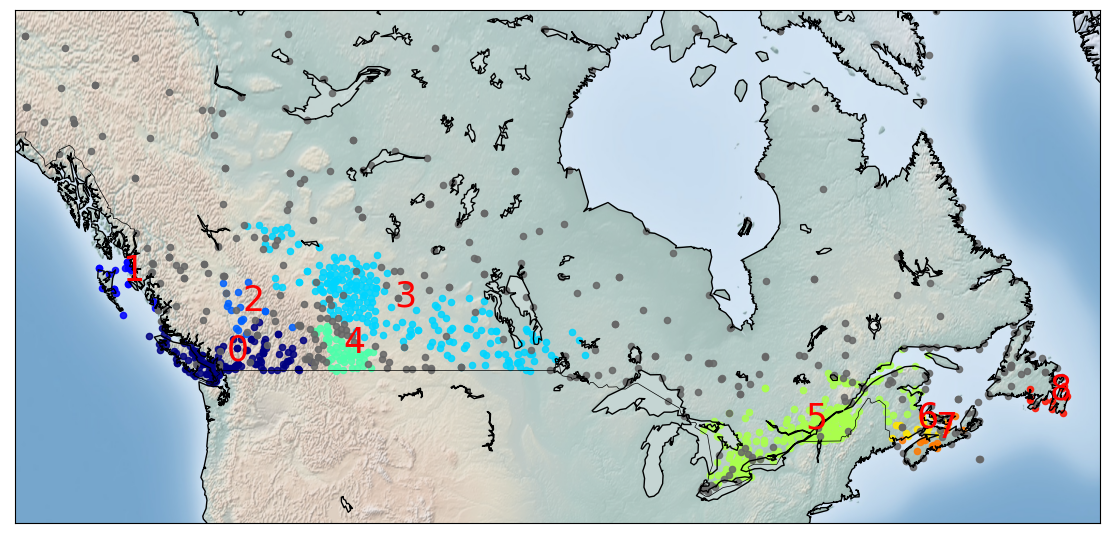

In [44]:
from mpl_toolkits.basemap import Basemap
import matplotlib.pyplot as plt
from pylab import rcParams
%matplotlib inline
rcParams['figure.figsize'] = (14,10)

my_map = Basemap(projection='merc',
            resolution = 'l', area_thresh = 1000.0,
            llcrnrlon=llon, llcrnrlat=llat, #min longitude (llcrnrlon) and latitude (llcrnrlat)
            urcrnrlon=ulon, urcrnrlat=ulat) #max longitude (urcrnrlon) and latitude (urcrnrlat)

my_map.drawcoastlines()
my_map.drawcountries()
#my_map.drawmapboundary()
my_map.fillcontinents(color = 'white', alpha = 0.3)
my_map.shadedrelief()

# To create a color map
colors = plt.get_cmap('jet')(np.linspace(0.0, 1.0, clusterNum))



#Visualization1
for clust_number in set(labels):
    c=(([0.4,0.4,0.4]) if clust_number == -1 else colors[np.int(clust_number)])
    clust_set = pdf[pdf.Clus_Db == clust_number]                    
    my_map.scatter(clust_set.xm, clust_set.ym, color =c,  marker='o', s= 20, alpha = 0.85)
    if clust_number != -1:
        cenx=np.mean(clust_set.xm) 
        ceny=np.mean(clust_set.ym) 
        plt.text(cenx,ceny,str(clust_number), fontsize=25, color='red',)
        print ("Cluster "+str(clust_number)+', Avg Temp: '+ str(np.mean(clust_set.Tm)))

In [45]:
# Notice: For visualization of map, you need basemap package.
# if you dont have basemap install on your machine, you can use the following line to install it

#!pip install basemap==1.2.0 matplotlib==3.1

# Notice: you maight have to refresh your page and re-run the notebook after installation

### About the dataset

<h4 align = "center">
Environment Canada    
Monthly Values for July - 2015	
</h4>
<html>
<head>
<style>
table {
    font-family: arial, sans-serif;
    border-collapse: collapse;
    width: 100%;
}

td, th {
border: 1px solid #dddddd;
text-align: left;
padding: 8px;
}

tr:nth-child(even) {
background-color: #dddddd;
} </style>

</head>
<body>

<table>
  <tr>
    <th>Name in the table</th>
    <th>Meaning</th>
  </tr>
  <tr>
    <td><font color = "green"><strong>Stn_Name</font></td>
    <td><font color = "green"><strong>Station Name</font</td>
  </tr>
  <tr>
    <td><font color = "green"><strong>Lat</font></td>
    <td><font color = "green"><strong>Latitude (North+, degrees)</font></td>
  </tr>
  <tr>
    <td><font color = "green"><strong>Long</font></td>
    <td><font color = "green"><strong>Longitude (West - , degrees)</font></td>
  </tr>
  <tr>
    <td>Prov</td>
    <td>Province</td>
  </tr>
  <tr>
    <td>Tm</td>
    <td>Mean Temperature (°C)</td>
  </tr>
  <tr>
    <td>DwTm</td>
    <td>Days without Valid Mean Temperature</td>
  </tr>
  <tr>
    <td>D</td>
    <td>Mean Temperature difference from Normal (1981-2010) (°C)</td>
  </tr>
  <tr>
    <td><font color = "black">Tx</font></td>
    <td><font color = "black">Highest Monthly Maximum Temperature (°C)</font></td>
  </tr>
  <tr>
    <td>DwTx</td>
    <td>Days without Valid Maximum Temperature</td>
  </tr>
  <tr>
    <td><font color = "black">Tn</font></td>
    <td><font color = "black">Lowest Monthly Minimum Temperature (°C)</font></td>
  </tr>
  <tr>
    <td>DwTn</td>
    <td>Days without Valid Minimum Temperature</td>
  </tr>
  <tr>
    <td>S</td>
    <td>Snowfall (cm)</td>
  </tr>
  <tr>
    <td>DwS</td>
    <td>Days without Valid Snowfall</td>
  </tr>
  <tr>
    <td>S%N</td>
    <td>Percent of Normal (1981-2010) Snowfall</td>
  </tr>
  <tr>
    <td><font color = "green"><strong>P</font></td>
    <td><font color = "green"><strong>Total Precipitation (mm)</font></td>
  </tr>
  <tr>
    <td>DwP</td>
    <td>Days without Valid Precipitation</td>
  </tr>
  <tr>
    <td>P%N</td>
    <td>Percent of Normal (1981-2010) Precipitation</td>
  </tr>
  <tr>
    <td>S_G</td>
    <td>Snow on the ground at the end of the month (cm)</td>
  </tr>
  <tr>
    <td>Pd</td>
    <td>Number of days with Precipitation 1.0 mm or more</td>
  </tr>
  <tr>
    <td>BS</td>
    <td>Bright Sunshine (hours)</td>
  </tr>
  <tr>
    <td>DwBS</td>
    <td>Days without Valid Bright Sunshine</td>
  </tr>
  <tr>
    <td>BS%</td>
    <td>Percent of Normal (1981-2010) Bright Sunshine</td>
  </tr>
  <tr>
    <td>HDD</td>
    <td>Degree Days below 18 °C</td>
  </tr>
  <tr>
    <td>CDD</td>
    <td>Degree Days above 18 °C</td>
  </tr>
  <tr>
    <td>Stn_No</td>
    <td>Climate station identifier (first 3 digits indicate   drainage basin, last 4 characters are for sorting alphabetically).</td>
  </tr>
  <tr>
    <td>NA</td>
    <td>Not Available</td>
  </tr>

</table>

</body>
</html>
